In [1]:
from smart_open import open
import pickle as pk
import pandas as pd
import wordcloud as wc
import gensim as gs
import gensim.corpora as cp
import pyLDAvis.gensim
import pyLDAvis

In [2]:
df_tk_pre = pk.load( open( "./data/pre_df_tk.p", "rb" ) )

In [3]:
df_tk_pre.head(5)

,ptitle,pscore,pid,pbody,pcreated,comment,cauthor,ccreated,pcreated_date,ccreated_date,involved_teams
0,[Pre-Match Thread] Porto vs Juventusntus (Cham...,64.0,lls3ua,**Porto vs Juventus**\n\nCompetition: UEFA Cha...,1.613589e+09,"[stop, sporting, winning, league, least, make,...",idek0k,1.613592e+09,2021-02-17 14:07:53,2021-02-17 15:07:27,Juventus vs Porto
1,[Pre-Match Thread] Porto vs Juventusntus (Cham...,64.0,lls3ua,**Porto vs Juventus**\n\nCompetition: UEFA Cha...,1.613589e+09,"[dont, follow, liga, no, closely, portuguese, ...",kuzjaruge,1.613590e+09,2021-02-17 14:07:53,2021-02-17 14:27:25,Juventus vs Porto
2,[Pre-Match Thread] Porto vs Juventusntus (Cham...,64.0,lls3ua,**Porto vs Juventus**\n\nCompetition: UEFA Cha...,1.613589e+09,"[go, porto, get, win, look, match, thread, pop...",TweakyWatson,1.613591e+09,2021-02-17 14:07:53,2021-02-17 14:36:02,Juventus vs Porto
3,[Pre-Match Thread] Porto vs Juventusntus (Cham...,64.0,lls3ua,**Porto vs Juventus**\n\nCompetition: UEFA Cha...,1.613589e+09,"[shame, fan, allowed, stadium, think, would, l...",rabbitvinyl,1.613596e+09,2021-02-17 14:07:53,2021-02-17 16:04:36,Juventus vs Porto
4,[Pre-Match Thread] Porto vs Juventusntus (Cham...,64.0,lls3ua,**Porto vs Juventus**\n\nCompetition: UEFA Cha...,1.613589e+09,"[juventusntus, take, easily, porto, fairly, de...",NunoxGames,1.613591e+09,2021-02-17 14:07:53,2021-02-17 14:41:04,Juventus vs Porto


# **Explore Word Cloud**

In [4]:
all_words = ''
for comment in df_tk_pre['comment']:
    all_words += ','.join(list(comment)) 
all_words

'stop,sporting,winning,league,least,make,country,proud,winning,old,ladydont,follow,liga,no,closely,portuguese,friend,want,give,u,quick,update,porto,form,special,player,lookgo,porto,get,win,look,match,thread,popcornshame,fan,allowed,stadium,think,would,lovely,see,reception,danilo,alex,sandro,return,ronaldo,fucking,love,playing,porto,fun,see,struggling,defense,try,contain,seems,like,ultimate,lethargic,midfield,battlejuventusntus,take,easily,porto,fairly,decent,team,ucl,theyre,quite,bad,season,there,supporter,made,estadio,dragão,hard,stadium,playoh,cuadrado,injured,suck,looking,forward,colombian,matchupmarega,masterclassmckennie,bentancur,rabiot,starting,might,troublesome,juventusntus,today,really,interesting,pirlo,take,game,rom,approach,playing,really,carefullyfucking,hope,bernardeschi,doesnt,start,dude,actual,terroristhappy,get,watch,goat,play,champion,league,footballdont,see,juventusntus,beating,team,big,number,moment,always,seem,struggle,creating,chance,ive,heard,porto,solid,defence,p

In [5]:
len(all_words)

909205

In [6]:
wordcloud = wc.WordCloud(background_color="white", max_words=100000, contour_width=3, contour_color='steelblue')

In [7]:
wordcloud.generate(all_words)

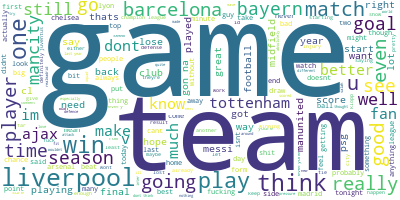

In [8]:
wordcloud.to_image()

# **Data Preparation**

In [9]:
all_words = []
for comment in df_tk_pre['comment']:
    all_words.append(comment)
list(all_words)

[['stop',
  'sporting',
  'winning',
  'league',
  'least',
  'make',
  'country',
  'proud',
  'winning',
  'old',
  'lady'],
 ['dont',
  'follow',
  'liga',
  'no',
  'closely',
  'portuguese',
  'friend',
  'want',
  'give',
  'u',
  'quick',
  'update',
  'porto',
  'form',
  'special',
  'player',
  'look'],
 ['go', 'porto', 'get', 'win', 'look', 'match', 'thread', 'popcorn'],
 ['shame',
  'fan',
  'allowed',
  'stadium',
  'think',
  'would',
  'lovely',
  'see',
  'reception',
  'danilo',
  'alex',
  'sandro',
  'return',
  'ronaldo',
  'fucking',
  'love',
  'playing',
  'porto',
  'fun',
  'see',
  'struggling',
  'defense',
  'try',
  'contain',
  'seems',
  'like',
  'ultimate',
  'lethargic',
  'midfield',
  'battle'],
 ['juventusntus',
  'take',
  'easily',
  'porto',
  'fairly',
  'decent',
  'team',
  'ucl',
  'theyre',
  'quite',
  'bad',
  'season',
  'there',
  'supporter',
  'made',
  'estadio',
  'dragão',
  'hard',
  'stadium',
  'play'],
 ['oh',
  'cuadrado',
  'i

In [10]:
# Create dictionary and corpus
word2num = cp.Dictionary(all_words)
texts = all_words
word2num

In [11]:
# Get term frequency
corpus = [word2num.doc2bow(text) for text in texts]
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 2)],
 [(10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1)],
 [(17, 1), (20, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)],
 [(20, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 2),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1)],
 [(20, 1),
  (55, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1)],
 [(79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1)],
 [(87, 1), (88, 1)],

In [12]:
from gensim import corpora, models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.31397029848085395),
 (1, 0.4607179555673147),
 (2, 0.17826774928107036),
 (3, 0.22167555361091876),
 (4, 0.18826872818087606),
 (5, 0.25809282967650415),
 (6, 0.33201101237153957),
 (7, 0.35635507793887183),
 (8, 0.2665105763266219),
 (9, 0.44490112569340584)]


# **LDA Model**

In [13]:
n_topics = 10
lda_model = gs.models.LdaMulticore(corpus=corpus, id2word=word2num, num_topics=n_topics)
doc_lda = lda_model[corpus]

In [14]:
lda_model.print_topics()

[(0,
  '0.009*"get" + 0.008*"dont" + 0.007*"one" + 0.007*"sure" + 0.007*"back" + 0.007*"win" + 0.006*"time" + 0.006*"goal" + 0.006*"see" + 0.005*"game"'),
 (1,
  '0.015*"think" + 0.013*"game" + 0.009*"one" + 0.008*"last" + 0.008*"like" + 0.008*"well" + 0.008*"season" + 0.008*"year" + 0.007*"goal" + 0.007*"team"'),
 (2,
  '0.018*"liverpool" + 0.014*"team" + 0.012*"get" + 0.010*"would" + 0.009*"win" + 0.009*"game" + 0.008*"goal" + 0.008*"salah" + 0.007*"going" + 0.007*"good"'),
 (3,
  '0.016*"game" + 0.012*"team" + 0.008*"best" + 0.007*"season" + 0.007*"cl" + 0.006*"league" + 0.006*"mancity" + 0.006*"player" + 0.006*"think" + 0.006*"liverpool"'),
 (4,
  '0.030*"liverpool" + 0.013*"win" + 0.011*"team" + 0.011*"play" + 0.009*"one" + 0.009*"like" + 0.007*"player" + 0.007*"would" + 0.007*"league" + 0.007*"goal"'),
 (5,
  '0.016*"game" + 0.015*"think" + 0.012*"liverpool" + 0.009*"dont" + 0.009*"team" + 0.009*"win" + 0.008*"year" + 0.008*"would" + 0.008*"like" + 0.008*"much"'),
 (6,
  '0.017*"

### LDA Model TF-IDF

In [15]:
lda_model_tfidf = gs.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=word2num, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))
    

Topic: 0 Word: 0.007*"like" + 0.005*"win" + 0.005*"know" + 0.005*"im" + 0.005*"one" + 0.004*"tottenham" + 0.004*"want" + 0.004*"go" + 0.004*"team" + 0.003*"good"
Topic: 1 Word: 0.006*"game" + 0.006*"yes" + 0.005*"thanks" + 0.004*"like" + 0.004*"see" + 0.003*"team" + 0.003*"think" + 0.003*"win" + 0.003*"one" + 0.003*"best"
Topic: 2 Word: 0.009*"liverpool" + 0.005*"deleted" + 0.004*"game" + 0.004*"goal" + 0.004*"think" + 0.004*"mancity" + 0.004*"win" + 0.004*"fan" + 0.004*"like" + 0.003*"season"
Topic: 3 Word: 0.051*"deleted" + 0.007*"win" + 0.006*"liverpool" + 0.005*"game" + 0.004*"goal" + 0.004*"madrid" + 0.004*"well" + 0.003*"team" + 0.003*"im" + 0.003*"think"
Topic: 4 Word: 0.008*"deleted" + 0.005*"good" + 0.004*"liverpool" + 0.004*"game" + 0.004*"true" + 0.003*"think" + 0.003*"still" + 0.003*"coys" + 0.003*"one" + 0.003*"get"
Topic: 5 Word: 0.010*"http" + 0.005*"yeah" + 0.005*"dont" + 0.003*"game" + 0.003*"think" + 0.003*"see" + 0.003*"like" + 0.003*"good" + 0.003*"thats" + 0.003*"l

# **Topic Analysis**

In [16]:
pyLDAvis.enable_notebook()

In [17]:
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, word2num)

In [18]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.013220  0.008919       1        1  15.910382
7     -0.008879 -0.015994       2        1  12.423008
1     -0.007161 -0.004140       3        1  12.197277
4     -0.022865 -0.000923       4        1  10.245900
6     -0.023634 -0.020858       5        1   9.791624
2     -0.056138  0.015333       6        1   9.373334
3     -0.036368 -0.000873       7        1   8.958748
0      0.065594  0.098329       8        1   7.287665
9      0.006497 -0.016563       9        1   7.126958
8      0.096174 -0.063229      10        1   6.685104, topic_info=          Term         Freq        Total Category  logprob  loglift
189  liverpool  1706.000000  1706.000000  Default  30.0000  30.0000
554    deleted   327.000000   327.000000  Default  29.0000  29.0000
39         fan   700.000000   700.000000  Default  28.0000  28.0000
27         get   768.000000   768.000000  Default  27.0000  27.0000
43        like  1096.000000  1096.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
725    mancity    43.855740   587.816331  Topic10  -5.3868   0.1098
219       well    39.200835   622.266155  Topic10  -5.4990  -0.0594
60       would    37.493023   885.709031  Topic10  -5.5436  -0.4569
99         rom    36.434644   649.253144  Topic10  -5.5722  -0.1750
189  liverpool    36.601085  1706.357918  Topic10  -5.5676  -1.1368

[778 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
11880      4  0.926715    accident
4580       2  0.092056    actively
4580       6  0.092056    actively
4580       8  0.736449    actively
12005     10  0.938719  adequately
...      ...       ...         ...
10690      7  0.102536        zaha
11916      7  0.909558          âr
11830      2  0.860072       ünder
11952      2  0.860699       þessu
8083       4  0.774798           つ

[2448 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 8, 2, 5, 7, 3, 4, 1, 10, 9])

In [19]:
pyLDAvis.save_html(LDAvis_prepared,'./html/lda_n10.html')

### Topic Analysis Tf-IDF

In [21]:
LDAvis_prepared_tf = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus, word2num)
LDAvis_prepared_tf
pyLDAvis.save_html(LDAvis_prepared_tf,'./html/ldatf-idf_n10.html')